In [1]:
pip install pandas scikit-learn matplotlib seaborn


==========================================
Bike Sharing Dataset
==========================================

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


=========================================
Background
=========================================

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,
environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

=========================================
Data Set
=========================================
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.

=========================================
Associated tasks
=========================================

	- Regression:
		Predication of bike rental count hourly or daily based on the environmental and seasonal settings.

	- Event and Anomaly Detection:  
		Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines.
		For instance, query like "2012-10-30 washington d.c." in Google returns related results to Hurricane Sandy. Some of the important events are
		identified in [1]. Therefore the data can be used for validation of anomaly or event detection algorithms as well.


=========================================
Files
=========================================

	- Readme.txt
	- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
	- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days


=========================================
Dataset characteristics
=========================================
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

=========================================
License
=========================================
Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

=========================================
Contact
=========================================

For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)


First few rows of the uploaded dataset:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit       temp     atemp       hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  0.805833   0.160446     331         654   
1           2  14.902598  17.68695  0.696087   0.248539     131         670   
2           1   8.050924   9.47025  0.437273   0.248309     120        1229   
3           1   8.200000  10.60610  0.590435   0.160296     108        1454   
4           1   9.305237  11.46350  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  


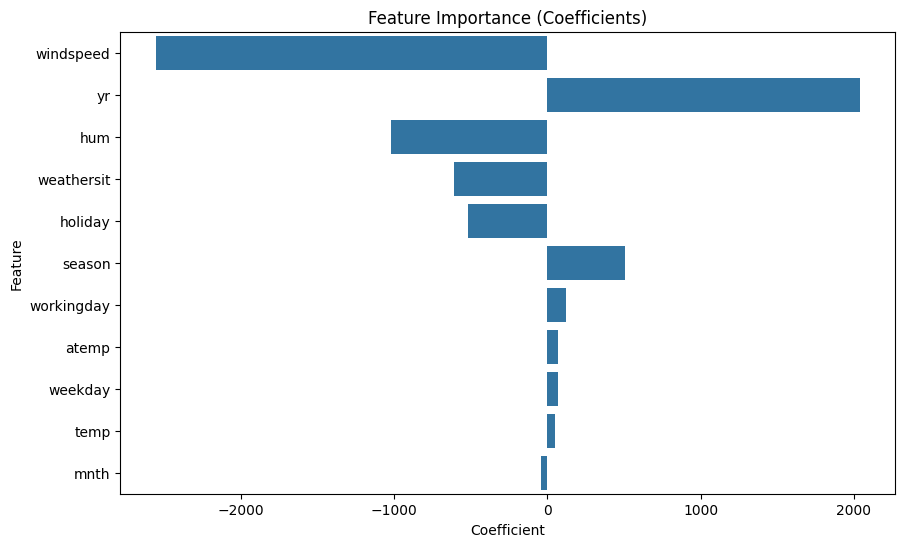


Correlation matrix of the dataset:


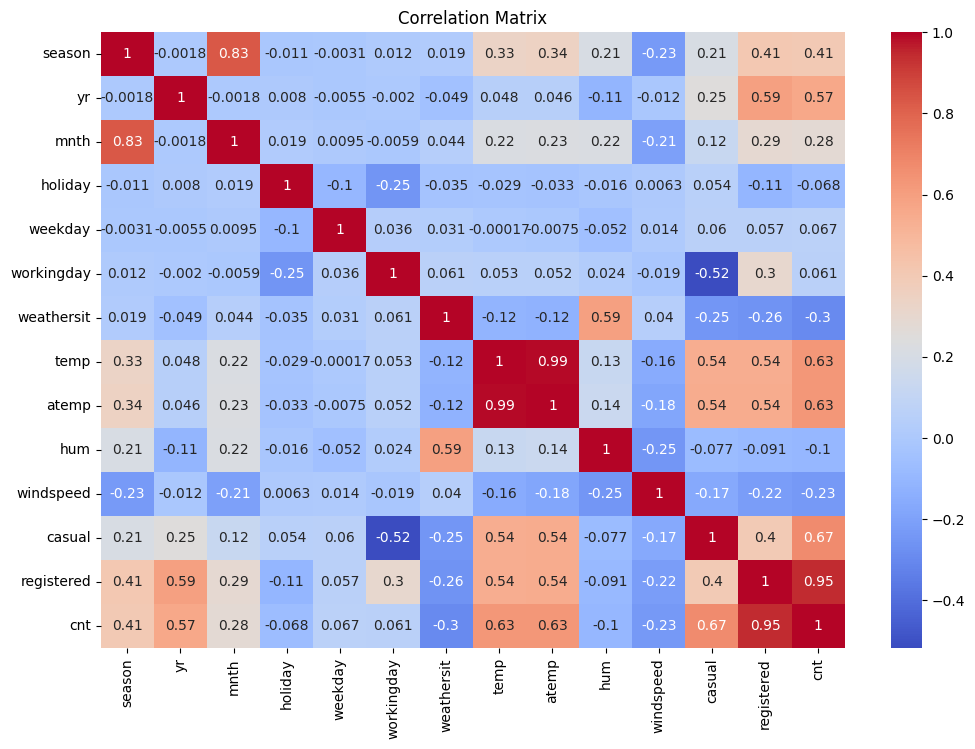


Plots for selected features vs. total rented bikes:


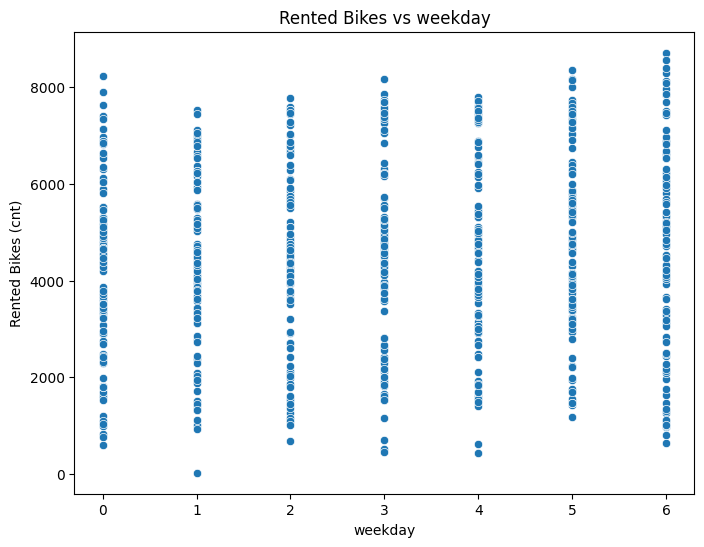

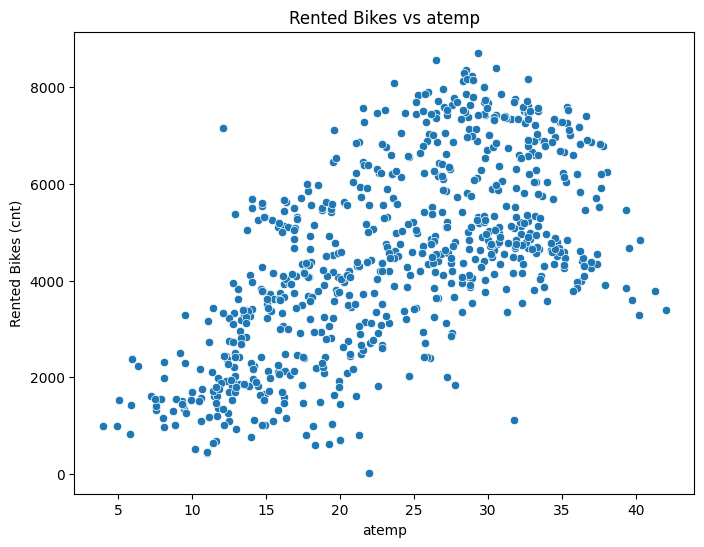

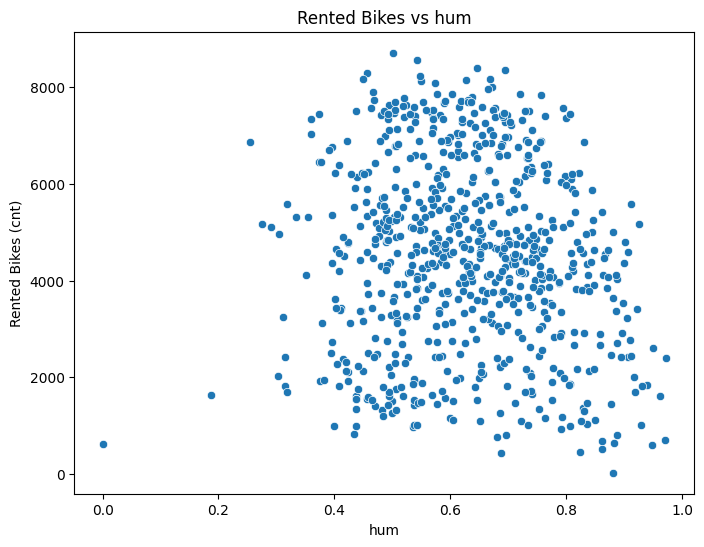

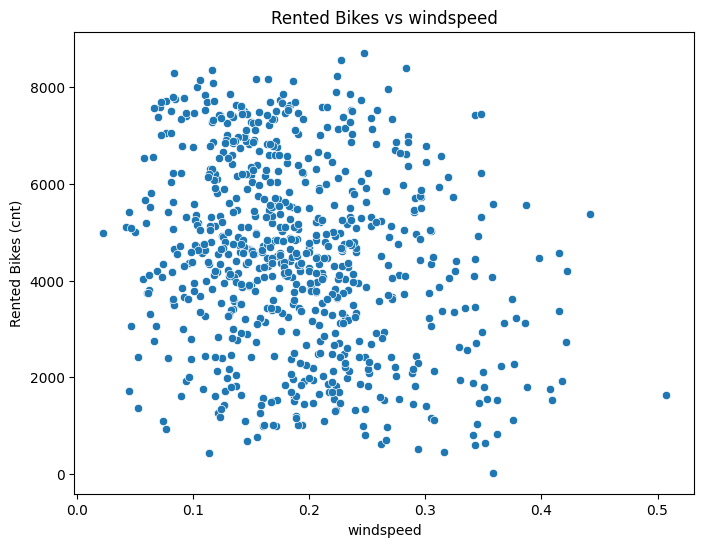

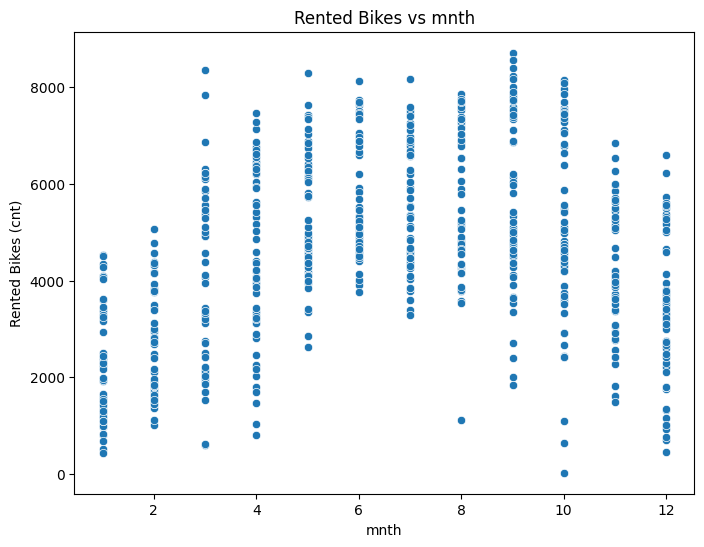

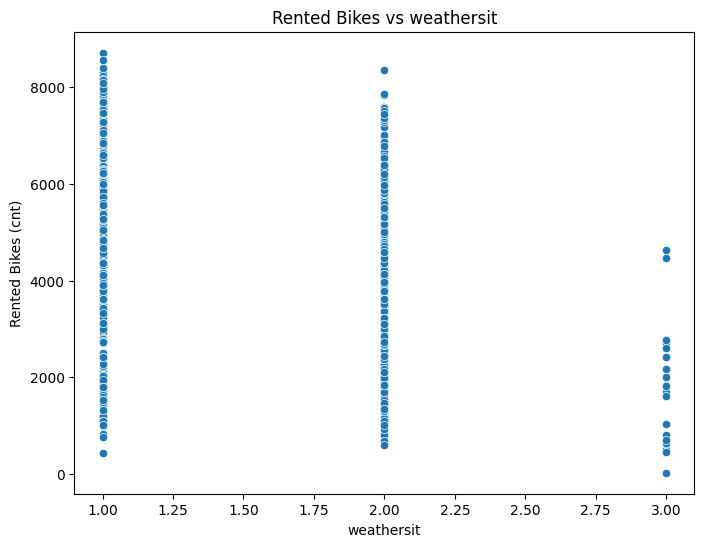

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_csv('day.csv')

#multiply 'temp' column values by 41 and 'atemp' column values by 50 (refer to Dataset characteristics)
df['temp'] *= 41
df['atemp'] *= 50
print("First few rows of the uploaded dataset:")
print(df.head())
print("\nColumn names in the dataset:")
print(df.columns.tolist())
print("\nNull values in the dataset:")
print(df.isnull().sum())

#drop non-numeric and useless columns from investigation
X = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])

#target variable
y = df['cnt']

#train the linear regression model using the whole dataset
model = LinearRegression()
model.fit(X, y)

#get the coefs and their corresponding headers
coefficients = model.coef_
features = X.columns

#create a df to display feature importance
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df['Absolute Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

#display feature importance
print("\nFeature importance based on linear regression coefficients:")
print(importance_df)

#plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance_df)
plt.title('Feature Importance (Coefficients)')
plt.show()

#correlation matrix
print("\nCorrelation matrix of the dataset:")
plt.figure(figsize=(12, 8))
correlation_matrix = df.drop(columns=['dteday', 'instant']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print("\nPlots for selected features vs. total rented bikes:")
selected_features = ['weekday', 'atemp', 'hum', 'windspeed', 'mnth', 'weathersit']
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['cnt'])
    plt.title(f'Rented Bikes vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Rented Bikes (cnt)')
    plt.show()
